<a href="https://colab.research.google.com/github/takasshii/deeplearning_udemy/blob/main/simple_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##シンプルなディープランニング

公式ドキュメント
Irisデータセットを読み込みます。

https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

標準化は、平均値が0、標準偏差が1になるように変換する処理です。

https://scikit-learn.org/stable/modules/preprocessing.html

one-hot表現は、一箇所だけ1で残りは０の配列です。

https://keras.io/ja/utils/np_utils/

データを訓練用のデータとテスト用のデータに分割します。

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [3]:
#データの読み込み
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print(iris.data[:10])
print(iris.target[:10])
print(iris.data.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]
(150, 4)


In [7]:
#前処理
from sklearn import preprocessing
from keras.utils import np_utils

#標準化 
#データから平均値を引いて、標準偏差で割ったもの
#平均値を０になり、広がり具合が標準偏差になる
scaler = preprocessing.StandardScaler()
scaler.fit(iris.data)
x = scaler.transform(iris.data)
print(x[:10])

#one-hot表現にする（ひとつだけ1に）
t = np_utils.to_categorical(iris.target)
print(t[:10])


[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [11]:
#訓練データとテストデータ
from sklearn.model_selection import train_test_split

#訓練用とテスト用のデータに分ける
x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)
print(x_train.shape) #75%が訓練用
print(x_test.shape)

(112, 4)
(38, 4)


##モデルの構築

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Activation

#層を積み重ねる
model = Sequential()

#1→中間層のニューロンの数 2→入力層のニューロンの数(引数が4になるから)
model.add(Dense(32, input_dim=4))
#活性化関数(relu関数,層の数が増えても勾配消失が起こりにくいため採用)
model.add(Activation("relu"))
model.add(Dense(32))
model.add(Activation("relu"))
#出力層(出力が３種類なので)
model.add(Dense(3))
#活性化関数がsoftmax関数
model.add(Activation("softmax"))
#optimaizer→最適化アルゴリズム, loss→出力と正解の誤差を定義する(交差エントロピー), metrix→精度がどれくらいか表示 
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 32)                160       
                                                                 
 activation_36 (Activation)  (None, 32)                0         
                                                                 
 dense_37 (Dense)            (None, 32)                1056      
                                                                 
 activation_37 (Activation)  (None, 32)                0         
                                                                 
 dense_38 (Dense)            (None, 3)                 99        
                                                                 
 activation_38 (Activation)  (None, 3)                 0         
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-train

####desne_1

入力×ニューロン数＋バイアスの数
32×4+32=160

####dense_2

前のニューロン数×次のニューロン数＋バイアスの数
32×32+32

##学習

In [34]:
#全ての訓練データを使い切ると1エポックという→30回訓練データを使うようにする
#batch_size→訓練データを8つに分ける
history = model.fit(x_train, t_train, epochs=30, batch_size=8)

#lossが誤差関数　accuracyが正解率

Epoch 1/30
14/14 [==============================] - 0s 2ms/step - loss: 0.2973 - accuracy: 0.8750
Epoch 2/30
14/14 [==============================] - 0s 2ms/step - loss: 0.2905 - accuracy: 0.8750
Epoch 3/30
14/14 [==============================] - 0s 2ms/step - loss: 0.2840 - accuracy: 0.8750
Epoch 4/30
14/14 [==============================] - 0s 2ms/step - loss: 0.2785 - accuracy: 0.8750
Epoch 5/30
14/14 [==============================] - 0s 2ms/step - loss: 0.2724 - accuracy: 0.8929
Epoch 6/30
14/14 [==============================] - 0s 2ms/step - loss: 0.2664 - accuracy: 0.8929
Epoch 7/30
14/14 [==============================] - 0s 2ms/step - loss: 0.2603 - accuracy: 0.8929
Epoch 8/30
14/14 [==============================] - 0s 2ms/step - loss: 0.2550 - accuracy: 0.9018
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.9107
Epoch 10/30
14/14 [==============================] - 0s 2ms/step - loss: 0.2443 - accuracy: 0.9107
Epoch 11/30
14/14 [

##学習の推移

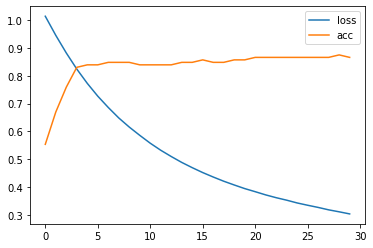

In [32]:
import matplotlib.pyplot as plt

hist_loss = history.history['loss']
hist_acc = history.history['accuracy']

#hist_lossの数だけ整数が与えられる
#(x,y,label)
plt.plot(np.arange(len(hist_loss)), hist_loss, label = 'loss')
plt.plot(np.arange(len(hist_acc)), hist_acc, label = 'acc')
plt.legend()
plt.show()

##評価

In [35]:
#テスト用の入力と正解を用いて誤差を表示する
loss, accuracy = model.evaluate(x_test, t_test)
print(loss,accuracy)

2/2 [==============================] - 0s 8ms/step - loss: 0.3179 - accuracy: 0.8684
0.3179198205471039 0.8684210777282715


##予測

In [36]:
model.predict(x_test)

array([[9.9662966e-01, 2.1352747e-03, 1.2349664e-03],
       [2.2114750e-02, 9.2802495e-01, 4.9860284e-02],
       [2.2483299e-02, 9.3058717e-01, 4.6929479e-02],
       [1.1926590e-02, 8.6128366e-01, 1.2678982e-01],
       [1.4989929e-02, 9.5374066e-01, 3.1269334e-02],
       [2.9636161e-02, 8.7433481e-01, 9.6029088e-02],
       [3.5628513e-02, 3.2013756e-01, 6.4423388e-01],
       [9.9758875e-01, 1.0370649e-03, 1.3741106e-03],
       [2.2352723e-02, 6.5708333e-01, 3.2056394e-01],
       [3.4330104e-02, 8.8611341e-01, 7.9556480e-02],
       [3.4432936e-02, 7.0096362e-01, 2.6460350e-01],
       [1.0835996e-03, 5.7631120e-02, 9.4128525e-01],
       [1.4388711e-02, 2.1583360e-01, 7.6977772e-01],
       [9.9673343e-01, 1.6662845e-03, 1.6002610e-03],
       [2.0612037e-02, 3.4378117e-01, 6.3560671e-01],
       [9.9527514e-01, 2.5953327e-03, 2.1294414e-03],
       [2.2467541e-02, 9.2406106e-01, 5.3471331e-02],
       [5.0584292e-03, 5.8656253e-02, 9.3628532e-01],
       [4.8423629e-02, 7.205

##保存

In [37]:
from keras.models import load_model

model.save('model.h5')
load_model('model.h5')